<a href="https://colab.research.google.com/github/AggelosRDio/MscMachineLearning/blob/master/ML6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 6

## Project Initialization

In [1]:
!pip install ydata-profiling

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Question 1

Describe the values of the features (describe). Since there are many features, you may use the ydata-profiling library, which takes a pandas DataFrame as input and automatically:

Detects the type of the features (Discrete, Continuous, Nominal variables, Time series, etc.).

Identifies Skewed Distributions, Missing Values, Correlated Data, Imbalanced Data, etc.

Computes and displays the data distributions.

In [ ]:
from ydata_profiling import ProfileReport

df = pd.read_csv("bankloan.csv")
profile = ProfileReport(df, title="Pandas Profiling Report")
profile


Author's note: Removed manually the output of the above code cell to allow for saving on github. The output with the HTML made the file too big (78mb) for github (max file size 25mb)

---

## Question 2 (Data Preprocessing & Visualization):

Consult the dataset description and the profiling dashboard generated in Question (1) in order to answer:

What is the mean, maximum, and minimum loan amount (loan_amnt) requested by applicants in the dataset?

Which variables can we remove for training a model? Remove the variables that are not needed.

Apply any other preprocessing method you consider necessary.

If the bank decides to grant loans to categories A, B1, B2, and we treat the target as whether a candidate will receive a loan or not (i.e., whether they belong to A, B1, or B2), what do you conclude about the targets? Create the corresponding target column.

Is there a requested loan amount range (e.g., from 20,000–25,000) for which applications are accepted with a probability of at least 15% among those who request it?
If yes, find and report such a range appropriately.

----

From the data above we observe the statistical data as follows:
min value: 1000
max value: 35000
mean value: 14965.483

This is further confirmed by the code below

In [4]:
max = df['loan_amnt'].max()
print(f"maximum loan amount: {max}")

min = df['loan_amnt'].min()
print(f"minimum loan amount: {min}")

mean = round(df.loc[:, 'loan_amnt'].mean(), 4)
print(f"mean loan amount: {mean}")

maximum loan amount: 35000
minimum loan amount: 1000
mean loan amount: 15257.9655


### Remove variables.

variables to remove:
1. ID Columns (id, member_id)
2. High Missing Values
3. Columns that refer to data that are about paying back the load (e.g. last payment amount)

In [5]:
df_processed = df.copy()
columns_to_remove = []

# 1 ID Columns
columns_to_remove.extend(['id', 'member_id'])

# 2 High Missing Value Columns
high_missing = df_processed.isnull().sum() / df_processed.shape[0]
columns_to_remove.extend(high_missing[high_missing > 0.5].index)

# 3 Columns referring to data post loan given
columns_to_remove.extend(['out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
                          'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'next_pymnt_d'])

df_clean = df_processed.drop(columns=columns_to_remove)
df_clean.head()



,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,...,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,...,31578,77.0,42,w,0,INDIVIDUAL,0,0,52303,41000
1,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,...,5084,38.8,41,w,0,INDIVIDUAL,0,332,175731,13100
2,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,...,12070,74.0,36,f,0,INDIVIDUAL,0,0,202012,16300
3,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,...,22950,66.0,41,f,0,INDIVIDUAL,0,0,108235,34750
4,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,...,4172,29.6,26,w,0,INDIVIDUAL,0,0,45492,14100


### Additional Preprocessing Methods

Additional preprocessing to be applied:
1. Fill in missing data


In [6]:
for column in df_processed.select_dtypes(include=[np.number]).columns:
  column_mean = df_processed[column].mean()
  df_processed.fillna(value=column_mean, inplace=True)

for column in df_processed.select_dtypes(include=['object']).columns:
  column_mode = df_processed[column].mode()
  df_processed.fillna(value=column_mode, inplace=True)

### Target Variable

If the bank decides to grant loans to categories A, B1, B2, and we treat the target as whether a candidate will receive a loan or not (i.e., whether they belong to A, B1, or B2), what do you conclude about the targets? Create the corresponding target column.

We are going to create a new column 'loan_approved' (1/0) as the target column.
If the bank grants loans to categories A, B1, B2 then we will add to the rows with these grades/subgrade 'loan_approved'=1, 0 to the rest.







In [7]:
grade_a = (df_processed['grade'] == 'A')
grade_b1 = (df_processed['grade'] == 'B') & (df_processed['sub_grade'] == 'B1')
grade_b2 = (df_processed['grade'] == 'B') & (df_processed['sub_grade'] == 'B2')

df_processed['loan_approved'] = np.where(grade_a | grade_b1 | grade_b2, 1, 0)

df_processed

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months,loan_approved
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,184.5,184.5,0,0,52303,41000,184.5,1.0,0.0,0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,184.5,184.5,0,332,175731,13100,184.5,1.0,0.0,0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,184.5,184.5,0,0,202012,16300,184.5,1.0,0.0,0
3,4.0,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,...,184.5,184.5,0,0,108235,34750,184.5,1.0,0.0,0
4,5.0,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,...,184.5,184.5,0,0,45492,14100,184.5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212994,184.5,54067695,57608436,20000,20000,36 months,13.33,677.07,C,C3,...,184.5,184.5,0,574,21474,5400,184.5,184.5,184.5,0
212995,184.5,54414443,57995197,6000,6000,36 months,11.53,197.95,B,B5,...,184.5,184.5,0,0,2176,4200,184.5,184.5,184.5,0
212996,184.5,54474829,58055589,18000,18000,60 months,19.19,468.82,E,E3,...,184.5,184.5,0,4404,8414,15300,184.5,184.5,184.5,0
212997,184.5,54354054,57934790,7050,7050,36 months,15.61,246.51,D,D1,...,184.5,184.5,0,0,159660,26800,184.5,184.5,184.5,0


### Identifying loan range

---

## Question 3 (Classification):

Use a classifier to predict whether an applicant is suitable for receiving a loan (according to question 2.4). You must:

- Normalize the inputs in an appropriate way. You are free to choose the method, but you must justify it.

- Split the dataset into train/test (70–30). Use the Stratify method for the split.

- Apply a suitable classifier to predict loan approval for a candidate.
You may choose any model, as long as you justify your choice.
  - Additionally, if you want, you may apply cross-validation on the training set to find good model parameters. Since the dataset is large, choose only the most sensitive parameter (optional).

**WARNING**: There is a variable that reveals the target, because the bank provides both the applicant’s category and the value of this variable. Identify this variable and remove it.

Report accuracy, F1, precision, recall for the best model on the validation set.
Which metrics are most important for this application? Justify.

From 2.4 we know that the target is leaked by the columns grade and sub_grade, so we will drop these columns

In [8]:
df_processed = df_processed.drop(['sub_grade', 'grade'], axis=1)
df_processed.head()

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_title,emp_length,...,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months,loan_approved
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,Accounting Clerk,1 year,...,184.5,184.5,0,0,52303,41000,184.5,1.0,0.0,0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,Accounts Payable Lead,7 years,...,184.5,184.5,0,332,175731,13100,184.5,1.0,0.0,0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,Nurse,6 years,...,184.5,184.5,0,0,202012,16300,184.5,1.0,0.0,0
3,4.0,59955769,63900496,10000,10000,36 months,10.99,327.34,Service Manager,10+ years,...,184.5,184.5,0,0,108235,34750,184.5,1.0,0.0,0
4,5.0,58703693,62544456,9550,9550,36 months,19.99,354.87,184.5,184.5,...,184.5,184.5,0,0,45492,14100,184.5,1.0,0.0,0


In [17]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X = df_processed.drop('loan_approved', axis=1)
y = df_processed['loan_approved']

label_encoders = {}
for col in X.select_dtypes(include=['object']).columns:
  le = LabelEncoder()
  X[col] = le.fit_transform(X[col].astype(str))
  label_encoders[col] = le

### Train/Test Split (70-30%) / Scaling

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42, stratify = y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

rf = RandomForestClassifier(n_estimators = 100, random_state=42, n_jobs=-1)
rf.fit(X_train_scaled, y_train)

y_pred = rf.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {accuracy}")
precision = precision_score(y_test, y_pred)
print(f"Precision score: {precision}")
recall = recall_score(y_test, y_pred)
print(f"Recall score: {recall}")
f1 = f1_score(y_test, y_pred)
print(f"F1 score: {f1}")


Accuracy score: 0.9999374021909233
Precision score: 0.9997825023109129
Recall score: 1.0
F1 score: 0.9998912393278591


---

## Question 4 (Feature Importance & Selection):

1. Train a Random Forest classifier (after normalization and splitting) and report the 15 most important features for loan prediction.

2. Print the correlation matrix for these features. Is there correlation among them?

3. Keep some features with low correlation among them and repeat Question 1.

In [29]:
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

top_features = feature_importance.head(15)
top_features

,feature,importance
5,int_rate,0.661008
21,total_rec_int,0.051528
37,term_ 60 months,0.036943
20,total_rec_prncp,0.025792
33,total_rev_hi_lim,0.021051
16,revol_util,0.015925
19,total_pymnt,0.015254
6,installment,0.014456
18,out_prncp,0.012163
25,last_pymnt_amnt,0.011942


### Correlation Matrix

In [30]:
correlation_matrix = X_train[top_features['feature'].values].corr()
correlation_matrix

,int_rate,total_rec_int,term_ 60 months,total_rec_prncp,total_rev_hi_lim,revol_util,total_pymnt,installment,out_prncp,last_pymnt_amnt,verification_status_Verified,funded_amnt,inq_last_6mths,annual_inc,dti
int_rate,1.000000,0.462335,0.450558,-0.106486,-0.195728,0.206034,0.092161,0.118546,0.136346,0.069768,0.236887,0.143519,0.231114,-0.081818,0.050736
total_rec_int,0.462335,1.000000,0.411552,0.467096,0.115709,0.154955,0.725807,0.571003,0.555801,0.366364,0.074058,0.615741,0.043905,0.109827,0.017360
term_ 60 months,0.450558,0.411552,1.000000,-0.102327,0.067622,0.094837,0.074114,0.124858,0.417796,0.069968,-0.022221,0.402786,-0.002596,0.038925,0.026361
total_rec_prncp,-0.106486,0.467096,-0.102327,1.000000,0.190403,0.022878,0.936252,0.489289,0.309749,0.562333,-0.020367,0.420382,-0.037280,0.138171,-0.013965
total_rev_hi_lim,-0.195728,0.115709,0.067622,0.190403,1.000000,-0.106204,0.188851,0.327569,0.346106,0.184405,-0.035414,0.356926,0.012258,0.248027,0.018359
revol_util,0.206034,0.154955,0.094837,0.022878,-0.106204,1.000000,0.075033,0.128084,0.126166,0.060623,0.117016,0.128091,-0.093644,0.038383,0.042818
total_pymnt,0.092161,0.725807,0.074114,0.936252,0.188851,0.075033,1.000000,0.587486,0.435290,0.565439,0.013162,0.550644,-0.011692,0.146687,-0.004295
installment,0.118546,0.571003,0.124858,0.489289,0.327569,0.128084,0.587486,1.000000,0.899283,0.553213,0.055465,0.942508,-0.008353,0.259403,0.001913
out_prncp,0.136346,0.555801,0.417796,0.309749,0.346106,0.126166,0.435290,0.899283,1.000000,0.463332,0.017671,0.968240,-0.040785,0.257273,0.006182
last_pymnt_amnt,0.069768,0.366364,0.069968,0.562333,0.184405,0.060623,0.565439,0.553213,0.463332,1.000000,0.029658,0.520506,0.000321,0.155991,-0.001333


### Low Correlation Features

In [31]:
# correlation_threshold = 0.7
# selected_features = []

# for feature in top_features['feature'].values:
#   is_correlated = False
#   for selected_feature in selected_features:
#     if abs(correlation_matrix.loc[feature, selected_feature]) > correlation_threshold:
#       is_correlated = True
#       break

#     if not is_correlated:
#       selected_features.append(feature)

# print("Selected Features with low correlation: ")
# selected_features

Selected Features with low correlation: 


[]

## Question 5 (Dimensionality Reduction):

1. Load the grayscale MNIST digit dataset (from the previous exercise).

2. Apply Standard Scaling to the data.

3. Apply PCA, reducing features to 300. Then train a KNN classifier with k = 5, 15, 51, 101.
Important:

    - Call pca.fit_transform on the training set,

    - but only pca.transform on the test set.

    Explain what would happen if we applied fit_transform separately on x_train and x_test, or if we combined them and applied PCA on everything together.
    Compute the classifier accuracy for each k.

4. Apply LDA, reducing features to 2 (lda.fit_transform on x_train, lda.transform on test).
Then:

    - Create a 2D scatter plot of x_train after LDA.

    - Use a different color for each digit.
    What do you observe about their separation?

5. Repeat Question 4 using the UMAP library: https://umap-learn.readthedocs.io/en/latest/

(You may need to install it in Colab: !pip install umap-learn)
Compare the separation achieved by U-MAP with that of LDA.

### Load the grayscale MNIST digit dataset

In [39]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, parser='auto')
X_mnist = mnist.data
y_mnist = mnist.target.astype(int)

X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = train_test_split(X_mnist, y_mnist, test_size=0.3, random_state=42, stratify=y_mnist)


### Apply Standard Scaling to the data.

In [38]:
scaler_mnist = StandardScaler()
X_train_mnist_scaled = scaler_mnist.fit_transform(X_train_mnist)
X_test_mnist_scaled = scaler_mnist.transform(X_test_mnist)

In [40]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA(n_components=300, random_state=42)
X_train_mnist_pca = pca.fit_transform(X_train_mnist_scaled)
X_test_mnist_pca = pca.transform(X_test_mnist_scaled)

k_values = [5, 15, 51, 101]

knn_results = []

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k, n_jobs=-1)
  knn.fit(X_train_mnist_pca, y_train_mnist)

  y_pred_knn = knn.predict(X_test_mnist_pca)
  accuracy_knn = accuracy_score(y_test_mnist, y_pred_knn)
  knn_results.append({'k': k, 'accuracy': accuracy_knn})


In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)

x_train_lda = lda.fit_transform(X_train_mnist_scaled, y_train_mnist)
x_test_lda = lda.transform(X_test_mnist_scaled)


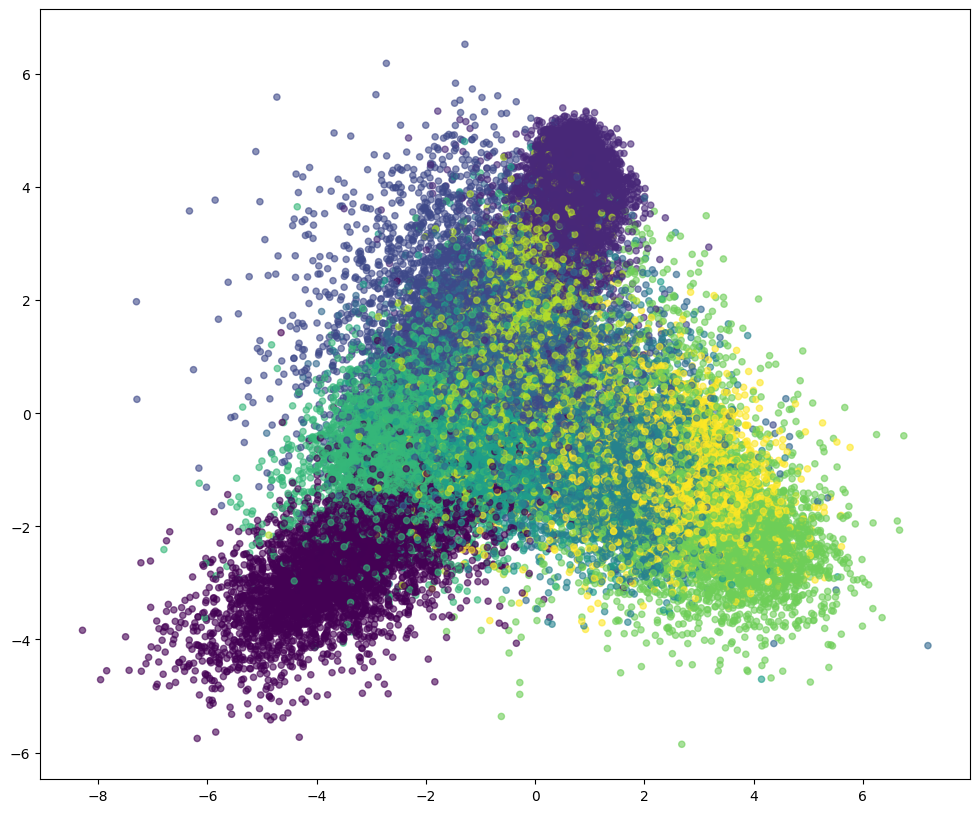

In [49]:
plt.figure(figsize=(12, 10))
scatter = plt.scatter(x_train_lda[:, 0], x_train_lda[:, 1], c=y_train_mnist, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter, label='digit')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('2D Scatter Plot of MNIST Data after LDA')
plt.show()


In [44]:
!pip install ydata-profiling umap-learn

In [45]:
import umap


reducer = umap.UMAP(n_components = 2, random_state = 42, n_neighbors = 15)
x_train_umap = reducer.fit_transform(X_train_mnist_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


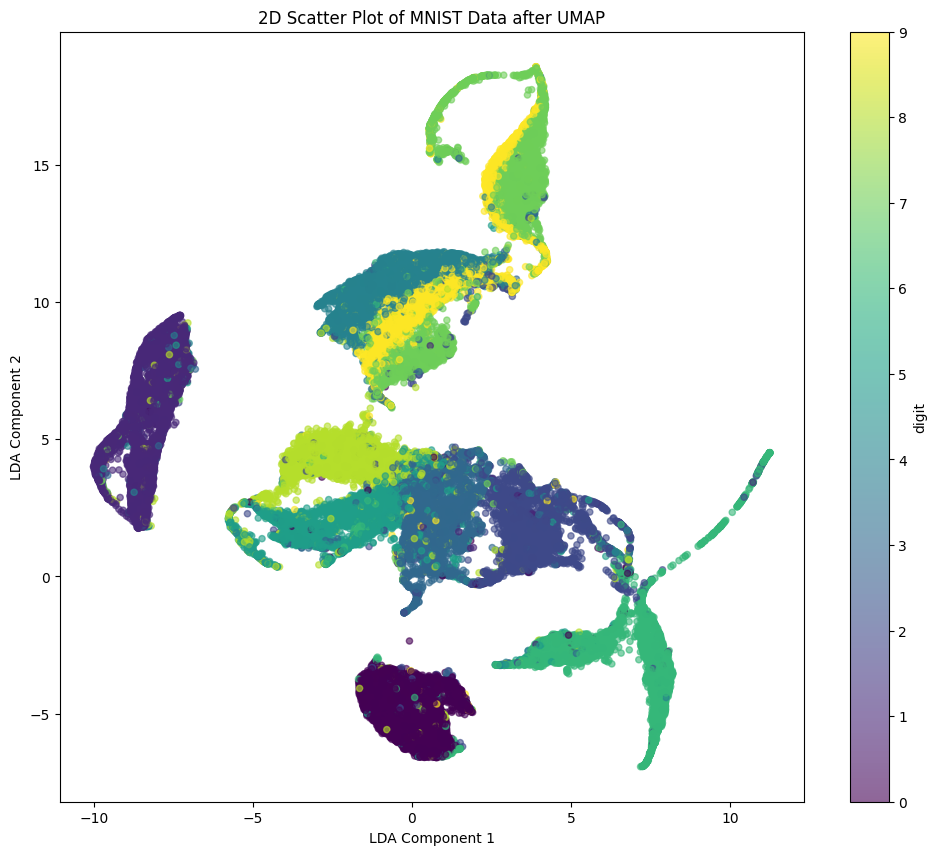

In [51]:
plt.figure(figsize=(12,10))
scatter = plt.scatter(x_train_umap[:, 0], x_train_umap[:, 1], c=y_train_mnist, cmap='viridis', alpha=0.6, s=20)
plt.colorbar(scatter, label='digit')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('2D Scatter Plot of MNIST Data after UMAP')
plt.show()